In [22]:
import pandas as pd
import requests

In [2]:
fname = '/mnt/lustre/datadive/Ecology/environmentaldata.csv'

In [3]:
data = pd.read_csv(fname, low_memory=False)

In [4]:
data.head()

,id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing,yr,month,day
0,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,BOD ATU,BOD : 5 Day ATU,85,<,3.00,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22
1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,Ammonia(N),Ammoniacal Nitrogen as N,111,<,0.50,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22
2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,Chloride Ion,Chloride,172,NaN,14.10,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22
3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,pH,pH,61,NaN,7.15,NaN,phunits,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22
4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,COD as O2,Chemical Oxygen Demand :- {COD},92,NaN,27.00,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22


In [5]:
data.columns

Index(['id', 'sample.samplingPoint', 'sample.samplingPoint.notation',
       'sample.samplingPoint.label', 'sample.sampleDateTime',
       'determinand.label', 'determinand.definition', 'determinand.notation',
       'resultQualifier.notation', 'result',
       'codedResultInterpretation.interpretation', 'determinand.unit.label',
       'sample.sampledMaterialType.label', 'sample.isComplianceSample',
       'sample.purpose.label', 'sample.samplingPoint.easting',
       'sample.samplingPoint.northing', 'yr', 'month', 'day'],
      dtype='object')

In [43]:
len(data['sample.sampleDateTime'].unique())

486176

In [10]:
data.iloc[0]['sample.samplingPoint']

'http://environment.data.gov.uk/water-quality/id/sampling-point/SO-19801A08'

In [11]:
data.iloc[0].id

'http://environment.data.gov.uk/water-quality/data/measurement/SO-617981-0085'

In [39]:
req = requests.get(data.iloc[0]['sample.samplingPoint'])
sample_data = req.json()
lat = sample_data['items'][0]['lat']
long = sample_data['items'][0]['long']

print(lat, long)

51.216762 -1.395023


In [44]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [46]:
geometry = [Point(xy) for xy in zip(data['sample.samplingPoint.easting'][:10], data['sample.samplingPoint.northing'][:10])]

In [60]:
gdf = GeoDataFrame(data[:10], geometry=geometry, crs=27700) 
gdf = gdf.to_crs(4326)

<AxesSubplot:>

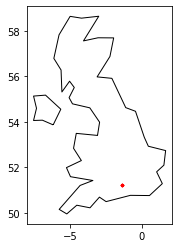

In [68]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[(world.name == "United Kingdom")].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5)

In [ ]:
gdf.iloc[0]

id                                          http://environment.data.gov.uk/water-quality/d...
sample.samplingPoint                        http://environment.data.gov.uk/water-quality/i...
sample.samplingPoint.notation                                                     SO-19801A08
sample.samplingPoint.label                                             APSLEY FARM BOREHOLE A
sample.sampleDateTime                                                     2000-03-22 10:30:00
determinand.label                                                                     BOD ATU
determinand.definition                                                        BOD : 5 Day ATU
determinand.notation                                                                       85
resultQualifier.notation                                                                    <
result                                                                                    3.0
codedResultInterpretation.interpretation                    